## Syntax
A few basic syntax examples will be shown to form the basis for the later examles.
The syntax is similar to MATLAB and if you have ever used MATLAB the basics should be graspable.

If you want a little overview over the syntax basics, please have look at the [fast track to julia page](https://juliadocs.github.io/Julia-Cheat-Sheet/)
The page can also be found at the cd.
Of interest are the following sections:
- Basics
- Operators
- Arrays
- Linear Algebra
- Control flow and loops
- Functions

### Syntax particularities

#### .
Adding a dot as an operator prefix maps it to a vector or matrix.

In [1]:
display(zeros(3,3))

Int.(zeros(3,3))

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

3×3 Matrix{Int64}:
 0  0  0
 0  0  0
 0  0  0

In [2]:
sqrt.([1,2,9])

3-element Vector{Float64}:
 1.0
 1.4142135623730951
 3.0

### Macros
A macro is denoted by an '@'.
The flowing expression is then modified by the respective macro. Julia parses the expression in an internal representation called an abstract syntax tree (AST). A macro can modify the AST and therefore change the outcome.
The following example might prove to be usefull.

#### @.
The @. macro turns all operations into vector/matrix-operations.

In [3]:
@. sin([0 1//2 * pi 1])

1×3 Matrix{Float64}:
 0.0  1.0  0.841471

In [4]:
@. 3 + [3 4 45]

1×3 Matrix{Int64}:
 6  7  48

#### @time
The time macro provides information about execution time and memory allocation.

In [5]:
@time collect(1:10000000);

  0.057785 seconds (2 allocations: 76.294 MiB, 22.48% gc time)


In [6]:
a_million = 1:1000000
@time begin
    for i in a_million
        sin(i)
    end
end

@time @. sin(a_million);

  0.132953 seconds (4.00 M allocations: 76.335 MiB, 10.35% gc time, 3.63% compilation time)
  0.094800 seconds (130.63 k allocations: 14.786 MiB, 31.88% gc time, 54.57% compilation time)


#### @threads
Multithreading can be achived easily with the threads macro.

([See here for adding multithread kernel to jupyter](https://julialang.github.io/IJulia.jl/stable/manual/installation/))\
When using the julia repl, more threads can be added via the -t option.

It is important to note, that the execution order is not fixed.

In [74]:
using Base.Threads # the import only needs to be done once per session
@threads for i in 1:4
    print(i, " ")
end
println("")
@threads for i in 1:4
    print(i, " ")
end
println("")
@threads for i in 1:4
    print(i, " ")
end

1 4 3 2 
1 2 3 4 
3 1 2 4 

#### @isdefined
Checks if value is defind

In [8]:
@isdefined(undefined_variable)

false

In [9]:
defined_variable = nothing
@isdefined(defined_variable)

true

### Unicode
Julia can evaluate unicode as variables, operators and function names. This aides on of the goals of the Julia proejct to let math look like math.

Unicode characters can be written in the repl and in jupyter by typing the latex-name and \<Tab\>\
    \alpha\<Tab\>    -> $\alpha$\
    \alpha_2\<Tab\> -> $\alpha_2$

In [10]:
α = 3
α ∈ [2,3,4]

true

In [11]:
3 ∉ [2,3,4]

false

In [12]:
(3,2,5) ∪ collect(1:2:10)

6-element Vector{Int64}:
 3
 2
 5
 1
 7
 9

In [13]:
(3,2,5) ∩ collect(0:2:10)

1-element Vector{Int64}:
 2

In [14]:
[3,4] ⊆ 1:10

true

In [15]:
function ∑(arr)
    acc = 0
    for i in arr
        acc += i
    end
    return acc
end
∑([3,4,5,6])

18

### composition and pipes
Functions can be combined either by composition or by pipes. Both tools can increase the readability tremendously.\
\circ\<Tab\> -> $\circ$\
The pipe is denoted by |> and wors similar to the classic unix pipe.

In [16]:
Int(sqrt(ceil(24.4)))

5

In [17]:
(Int ∘ sqrt ∘ ceil)(24.5)

5

In [18]:
24.5 |> ceil |> sqrt |> Int

5

### functional elements
Julia includes some concepts coming out of the funtional programming world. Namely, maps, filters, and lambdas.
A lambda function can be denoted in the follwing way.

In [19]:
sq = x -> x^2
sq(2)

4

Maps can be used to apply a lambda to all array elemets.

In [20]:
map(x -> x^2, 2:5)

4-element Vector{Int64}:
  4
  9
 16
 25

In [21]:
map((x,y) -> x*y, 1:3, reverse(1:3))

3-element Vector{Int64}:
 3
 4
 3

Most operations performed with maps can also done using dot notation. What is the best choice comes down to the specific case and personal preferenc.

In [22]:
collect(1:3) .* reverse(1:3)

3-element Vector{Int64}:
 3
 4
 3

In [23]:
filter(x -> sqrt(x) |> isinteger, 2:2:100)

5-element Vector{Int64}:
   4
  16
  36
  64
 100

### :strings (Symbols)
Symbols are similar to strings.
There are especially usefull to set options or name dict keys. Keep in mind, that Symbols and Strings cannot be used interchangable for hash objects like dicts.
The following example would set the output format of saved plots to png if the plotting module would be imported.

    default(
        dpi = 300,
        format = :png,
    )


In [24]:
d = Dict(
    :a => 3,
    "b" => 2
    )
d["b"]
d[:b]

LoadError: KeyError: key :b not found

### Implicit multiplication
Julia supports implicit multiplication but i would advice against this feature in situations where it can lead to amguity. Everything wich relies on operator precedence can become quite confusing quite fast.

In [86]:
x = 3
2x + sin(2pi)

6.0

### Rational number type
Rational number are denoted by n//m and are quite helpfull for some operations and improve readability a great deal.

In [114]:
1//2 + 1//3

5//6

The offer considerably more precision when converted to high precision number types.

In [121]:
BigFloat(1/2 + 1/3)

0.8333333333333332593184650249895639717578887939453125

In [115]:
BigFloat(1//2 + 1//3)

0.8333333333333333333333333333333333333333333333333333333333333333333333333333305

### Function arguments
Functions can take positional arguments, keyword arguments and optional arguments. All keword and optional arguments must be used after the positional arguments and be given a default value.

In [180]:
function example(a; b=2, kwargs...)
    kwargs = Dict(kwargs);
    if kwargs |> keys |> length > 0
        println(kwargs)
    end
    return a * b
end

example (generic function with 3 methods)

In [183]:
println(example(2))
println(example(2,b=3))
println(example(2,b=3, c=4, d=[3,29,4]))

4
6
Dict{Symbol, Any}(:d => [3, 29, 4], :c => 4)
6


#

#

#

## Typesystem and Multiple Dispatch

Julia is optionaly typed. In general code can be written without thinking about types.
However, performance can be increase by typing variables and functions.

The main use for types is multiple dispatch which is a kind of polymorphism. Julia is not object oriented like lots of common languages. Instead it provides an extensive syntax to overload functions.

The following block provides 3 definitions for the range functions. Which of these is called is deced by the number of arguments.

In [25]:
function range(last::Integer)
    1:last |> transpose |> collect
end

function range(first::Integer,last::Integer)
    first:last |> transpose |> collect
end

function range(first::Integer,step::Real,last::Integer)
    first:step:last |> transpose |> collect
end

range (generic function with 3 methods)

In [26]:
range(5)

1×5 Matrix{Int64}:
 1  2  3  4  5

In [27]:
range(5,5,45)

1×9 Matrix{Int64}:
 5  10  15  20  25  30  35  40  45

### Overloading builtin functions

It is also possible to overload existing functions
if there are explicitly imported.
The following example extends the + to allow infix notiation of mering dictionaries.

In [28]:
import Base.+
d1 = Dict(:a => 1)
d2 = Dict(:b => 2)

function +(d1::Dict, d2::Dict)
    merge(d1,d2)
end

+ (generic function with 209 methods)

In [29]:
d1 + d2

Dict{Symbol, Int64} with 2 entries:
  :a => 1
  :b => 2

### Type hierarchy
Julia has abstract types and primitive types.
Those concepts are easiest explained with number types.
There are the following abstract types:

- Number
    - Real
        - AbstractFloat
        - Integer
            - Signed
            - Unsigned
            
For example is every Integer a Real and every Signed an Integer. Hence does a function defined with
function name(arg::Integer) takes arguments of abstract type Integer, Signed and Real.

Each abstract type has primitive implementationns. Most common are Int64 and Float64 for numbers.
In Functions definitions the abstract types usuallay suffice.

## Ecosystem
Julia as most modern languages builts on community made packages. It is therefore easy to install and create those.

### Installation
Use the package module



In [40]:
# Warning
# executiong the following may take more than a minute
# but is necessary for the following examples.
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


or the Julia-repl, just hit "]" to enter package mode.
packages can than be added with

    add PackageName
    
Multiple packages can be specified

    add LinearAlgebra Plots
    
It is also possible to install packages which are not officially supported.
The following command installs the code i used for the simulations in my bachelorsthesis and pulls the necesary dependencies.
    
    add https://github.com/onecalfman/IntegratedOscillatorModel.jl
    
### Import  
Packages are imported with using PackageName

In [52]:
using Plots
using Plots.Measures

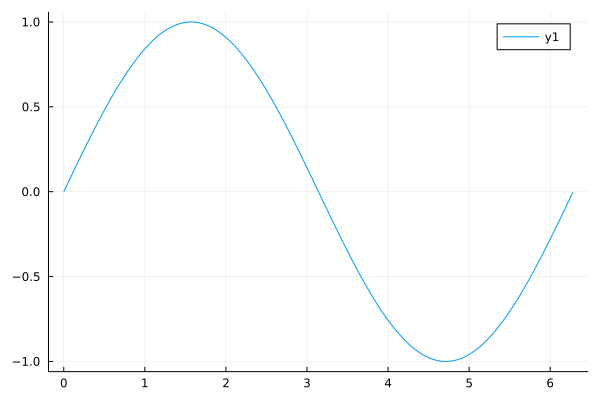

In [53]:
plot(0:0.01:2pi, x -> sin(x))

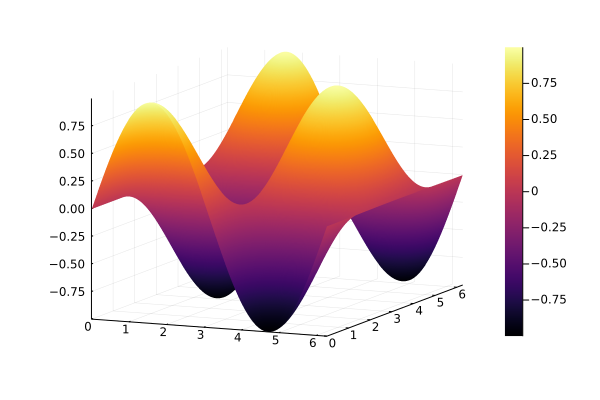

In [85]:
surface(
    0:0.01:2pi, 0:0.01:2pi,
    (x,y) -> sin(x)cos(y),
    margin = 10mm
)

### Creation
As it is very simple to create packages i would advice to do so for larger projects. [This guid](https://pkgdocs.julialang.org/v1/creating-packages/) gives a good introduction.
Note that all variables and functions wich shall be accessible after importing the package must be exported at the beginning of the module.
See [my own module](https://github.com/onecalfman/IntegratedOscillatorModel.jl/blob/main/src/IntegratedOscillatorModel.jl) as an example.

## Resources

- [Website](https://julialang.org/)
- [YouTube Channel](https://www.youtube.com/c/TheJuliaLanguage)
- [Forum](https://discourse.julialang.org/)
- [Cheatsheet](https://juliadocs.github.io/Julia-Cheat-Sheet/)
- [Comparison of MATLAB, Python and Julia Commands](https://cheatsheets.quantecon.org/)
- [docs](https://docs.julialang.org/en/v1/)

### Library of interest

- [Plots](https://docs.juliaplots.org/latest/tutorial/)
- [Gadfly (alternative ploting module)](http://gadflyjl.org/stable/)
- [DifferentialEquations](https://diffeq.sciml.ai/stable/)
- [Linear Algebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/)
- [DataFrames](https://dataframes.juliadata.org/stable/)